### Studi Kasus: Implementasi Fuzzy Inference System

In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### SOAL

Buatlah implementasi logika fuzzy di kasus nyata. Kasus ditentukan sendiri dengan ketentuan sebagai berikut:
- Bukan contoh kasus yang pernah muncul di materi kuliah di google classroom ini
- Contoh kasus harus benar-benar real dan dapat diukur oleh alat ukur atau sensor. Misal: tingkat kecintaan seseorang tidak bisa terukur oleh alat ukur
- Membership pada masukan minimal ada 3,
- Membership pada luaran minimal ada 3,
- Beri penjelasan
- Gunakan ipynb

### JAWABAN

Studi Kasus Prediksi Banjir di DKI Jakarta, dengan rincian sebagai berikut:

- Input berupa nilai Ketinggian air di suatu pintu bendungan dalam cm, dan nilai curah hujan dalam mm
- Output berupa kategori prediksi banjir: Kemungkinan kecil, Kemungkinan sedang dan Kemungkinan Tinggi

Nilai Ketinggian Air misalnya pada pintu air bendungan Katulampa, data dapat diakses pada web https://bpbd.jakarta.go.id/waterlevel, dengan membership masukkan sebayak 3 yaitu:
1. Siaga III : 80 - 150 cm
2. Siaga II : 150 - 200 cm
3. Siaga I : > 200 cm

Nilai curah hujan rata-rata, data dapat diakses pada web https://bmkgsampali.net/normal-hujan-bulanan/, dengan membership masukkan sebayak 3 yaitu:
1. Rendah : 0 - 100 mm
2. Menengah : 100 - 300 mm
3. Tinggi : 300 - 500 mm

Sehingga dari data tersebut coba untuk dikonversi ke bentuk Fuzzy Inference System sebagai berikut:

| S\CH | R    | M   | T   |
|------|------|-----|-----|
|  S3  | KK   | KS  | KS  |
|  S2  | KK   | KS  | KT  |
|  S1  | KS   | KS  | KT  |

Penjelasan :

S = Siaga
- S3 = Siaga III (skala < 150 cm, puncak 80 cm)
- S2 = Siaga II (skala 100 - 220 cm, puncak 150 - 200 cm)
- S1 = Siaga I (skala > 200 cm, puncak 240 cm)

CH = Curah Hujan
- R = Rendah (skala < 100 mm, puncak 0 mm)
- M = Menengah (skala 50 - 400 mm, puncak 100 - 300 mm)
- T = Tinggi (skala > 300 mm, puncak 500 mm)

KB = Kemungkinan Banjir
- KK = Kemungkinan Kecil (skala < 4, puncak 0)
- KS = Kemungkinan Sedang (skala 3 - 8, puncak 4 - 7)
- KT = Kemungkinan Tinggi (skala > 7, puncak 10)

In [2]:
# Definisikan range Antecedent dan Consequent

siaga = ctrl.Antecedent(np.arange(80, 241, 1), 'Siaga')
curah_hujan = ctrl.Antecedent(np.arange(0, 501, 1), 'Curah Hujan')
banjir = ctrl.Consequent(np.arange(0, 11, 1), 'Kemungkinan Banjir')

In [3]:
# Tingkat Siaga bendungan
siaga['Siaga 3'] = fuzz.trimf(siaga.universe, [80, 80, 150])
siaga['Siaga 2'] = fuzz.trapmf(siaga.universe, [100, 150, 200, 220])
siaga['Siaga 1'] = fuzz.trimf(siaga.universe, [200, 240, 240])

# Tingkat Curah hujan
curah_hujan['Rendah'] = fuzz.trimf(curah_hujan.universe, [0, 0, 100])
curah_hujan['Menengah'] = fuzz.trapmf(curah_hujan.universe, [50, 100, 300, 400])
curah_hujan['Tinggi'] = fuzz.trimf(curah_hujan.universe, [300, 500, 500])

# Tingkat Kemungkinan terjadi Banjir
banjir['Kemungkinan Kecil'] = fuzz.trimf(banjir.universe, [0, 0, 4])
banjir['Kemungkinan Sedang'] = fuzz.trapmf(banjir.universe, [3, 4, 7, 8])
banjir['Kemungkinan Tinggi'] = fuzz.trimf(banjir.universe, [7, 10, 10])

/Users/arul/opt/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


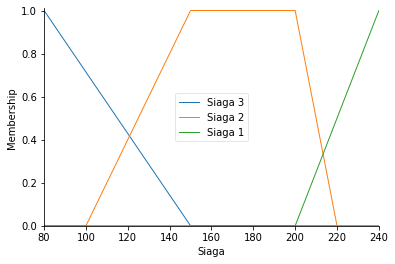

In [4]:
# Lihat membership dari input 1
siaga.view()

/Users/arul/opt/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


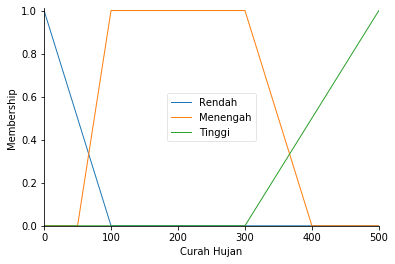

In [5]:
# Lihat membership dari input 2
curah_hujan.view()

/Users/arul/opt/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


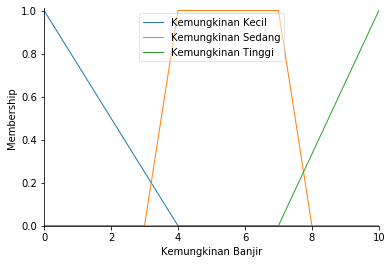

In [6]:
# Lihat membership dari output
banjir.view()

In [7]:
# Rule berdasarkan tabel FIS
rule1 = ctrl.Rule(siaga['Siaga 3'] & curah_hujan['Rendah'], banjir['Kemungkinan Kecil'])
rule2 = ctrl.Rule(siaga['Siaga 2'] & curah_hujan['Rendah'], banjir['Kemungkinan Kecil'])
rule3 = ctrl.Rule(siaga['Siaga 1'] & curah_hujan['Rendah'], banjir['Kemungkinan Sedang'])
rule4 = ctrl.Rule(siaga['Siaga 3'] & curah_hujan['Menengah'], banjir['Kemungkinan Sedang'])
rule5 = ctrl.Rule(siaga['Siaga 2'] & curah_hujan['Menengah'], banjir['Kemungkinan Sedang'])
rule6 = ctrl.Rule(siaga['Siaga 1'] & curah_hujan['Menengah'], banjir['Kemungkinan Sedang'])
rule7 = ctrl.Rule(siaga['Siaga 3'] & curah_hujan['Tinggi'], banjir['Kemungkinan Sedang'])
rule8 = ctrl.Rule(siaga['Siaga 2'] & curah_hujan['Tinggi'], banjir['Kemungkinan Tinggi'])
rule9 = ctrl.Rule(siaga['Siaga 1'] & curah_hujan['Tinggi'], banjir['Kemungkinan Tinggi'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa21722510>)

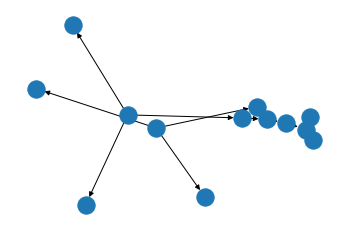

In [8]:
rule1.view()

In [9]:
# Masukkan semua rules pada control system
banjir_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
kemungkinan_banjir = ctrl.ControlSystemSimulation(banjir_ctrl)


Ketinggian Air pada Pintu Bendungan (80-220 cm): 180
Rata-rata Curah Hujan (0-500 mm): 400
Kemungkinan terjadinya Banjir di DKI Jakarta (1-10):  8.83


/Users/arul/opt/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


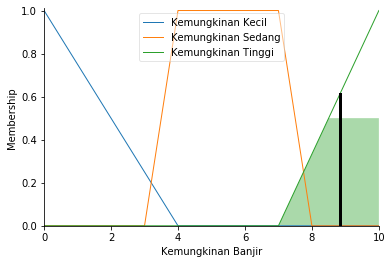

In [10]:
# Masukkan nilai input yang tersedia
S = float(input('Ketinggian Air pada Pintu Bendungan (80-220 cm): '))
CH = float(input('Rata-rata Curah Hujan (0-500 mm): '))

if (S > 220) or (CH > 500) or (S < 80) or (CH < 0):
    print('\nNilai yang dimasukkan diluar range yang diberikan')
    print('Harap masukkan nilai sesuai range yang ada')
else:
    kemungkinan_banjir.input['Siaga'] = S
    kemungkinan_banjir.input['Curah Hujan'] = CH
    
    kemungkinan_banjir.compute()
    
    # Tampilkan grafik Fuzzy Inference System dan tampilkan nilai ouput
    banjir.view(sim=kemungkinan_banjir)
    print('Kemungkinan terjadinya Banjir di DKI Jakarta (1-10): ', '{:0.2f}'.format(kemungkinan_banjir.output['Kemungkinan Banjir']))
